<a href="https://colab.research.google.com/github/chris-kehl/Spider_Classifier/blob/main/Spiders_of_Kentucky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the libraries

In [ ]:
# import all the needed starter packages
!pip install -Uqq fastbook
import fastbook
import warnings
import os
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

     |████████████████████████████████| 720 kB 14.4 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 188 kB 34.0 MB/s 
     |████████████████████████████████| 1.2 MB 37.5 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 51 kB 305 kB/s 
Mounted at /content/gdrive


We are going to use the GPU (Graphics processing units) with the fastai library. 



Import all the needed packages to start the fastAi packages.
We are first going to install the fastbook library.
This library will contain all the needed libraries for fastai.

Next we are going to import our fastbook and fastai widgets.
The os is for our operating system.  We want directory access.

In [ ]:
# import fastbook
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
# setup for the use of the GPU vs CPU
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

!nvidia-smi

Mon Aug  2 15:04:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    48W / 300W |  15949MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# current working directory
os.getcwd()

'/content'

The following line will allow me to change my directory to my google drive stored on the cloud.

In [ ]:
# change to google drive
os.chdir('/content/gdrive/MyDrive/')

In [ ]:
# verify the directory
os.getcwd()

'/content/gdrive/MyDrive'

Setup Microsoft Bing keys used to scrape the web for Kentucky tree 
images

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '8d45d7506c8e4e78ad0804f1dbea420f')

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

In [ ]:
results = search_images_bing(key, 'Brown Recluse')
ims = results.attrgot('content_url')
len(ims)

150

In [ ]:
results

(#150) [{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=Brown+Recluse&id=6916BAEEB9697FD81D3A5A97DDC3CB24B5D87F3B&simid=608024003232360099', 'name': '4 Tips to Keep Brown Recluse Spiders Out of Your Home', 'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.y6mgBeNiUvpw5eOjwnq5cwHaE8&pid=Api', 'datePublished': '2018-02-04T12:00:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'https://www.hopperenvironmentalservices.com/images/blog/brown-recluse.jpg', 'hostPageUrl': 'https://www.hopperenvironmentalservices.com/blog/2018/february/4-tips-to-keep-brown-recluse-spiders-out-of-your/', 'contentSize': '8734771 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'https://www.hopperenvironmentalservices.com/blog/2018/february/4-tips-to-keep-brown...', 'width': 5184, 'height': 3456, 'hostPageDiscoveredDate': '2018-02-04T12:00:00.0000000Z', 'thumbnail': {'width': 474, 'height': 316}, 'imageInsightsToken': 'ccid_y6mgBeNi*cp_C829EEF621000A4AF31D083D5574E3DC*mid

In [ ]:
ims = ['https://scx2.b-cdn.net/gfx/news/hires/2018/brownrecluse.jpg']

In [ ]:
dest = 'brownrecluse.jpg'
download_url(ims[0], dest)

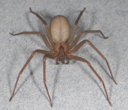

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

Setup folders and directories to hold the different types of KY native spiders.

site referance https://spideridentifications.com/spiders-in-us/spiders-in-kentucky

In [ ]:
spider_types = 'Southern Black Widow', 'Northern Black Widow', 'Brown Recluse', 'Star-bellied Orb-weaver', 'Red-spotted Orb-weaver', 'Arabesque Orb-weaver', 'Arrowhead Orb-weaver','Yellow Garden', 'Banded Garden', 'Arrow-shaped Micrathena', 'Araneus miniatus', 'Bold Jumper', 'Canopy Jumping', 'Tan Jumping', 'Dimorphic Jumper','Emerald Jumping Spider', 'Marpissa lineata', 'Phidippus putnami','Dark Fishing', 'Six-spotted Fishing', 'Striped Fishing', 'Dolomedes vittatus','White-banded Crab', 'Southeastern Wandering', 'Subsocial Tangle Web', 'Twospotted Cobweb', 'Triangulate Cobweb', 'Common House', 'Rhomphaea fictilium', 'Spintharus flavidus', 'Ariadna bicolor', 'Castianeira amoena', 'Castianeira longipalpa', 'Meriola decepta', 'Cesonia bilineata', 'Sergiolus capulatus', 'Thanatus formicinus', 'Tiger Wolf (Tigrosa aspersa)', 'Tigrosa georgicola', 'Tigrosa helluo', 'KENTUCKY PURSEWEB'

path = Path('spider')


Making the spider directory and downloading all the images listed above into their own folder in the spider folder.


In [ ]:
if not path.exists():
  path.mkdir()
  for o in spider_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} spider')
    download_images(dest, urls=results.attrgot('contentUrl'))

fns is getting the images and putting them into their correct path.

In [ ]:
fns = get_image_files(path)
fns

(#5539) [Path('spider/Southern Black Widow/00000003.jpg'),Path('spider/Southern Black Widow/00000006.jpg'),Path('spider/Southern Black Widow/00000005.jpg'),Path('spider/Southern Black Widow/00000009.jpg'),Path('spider/Southern Black Widow/00000001.jpg'),Path('spider/Southern Black Widow/00000012.jpg'),Path('spider/Southern Black Widow/00000004.jpg'),Path('spider/Southern Black Widow/00000000.jpg'),Path('spider/Southern Black Widow/00000007.jpg'),Path('spider/Southern Black Widow/00000002.jpg')...]

failed will look for and identify any corrupt image files. Followed by the failed.map(Path.unlink) will unlink any failed or corrupt files.

In [ ]:
failed = verify_images(fns)
failed

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#0) []

In [ ]:
#remove failed files
failed.map(Path.unlink);

Format the downloaded data into a format that is suitable for model training. Fastai uses dataloaders


In [ ]:
class DataLoaders(GetAttr):
  def __init(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train, valid = add_props(lambda i,self: self[i])

In [ ]:
# were using the splitter here to split the data 80% training set and 20% test set
spiders = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

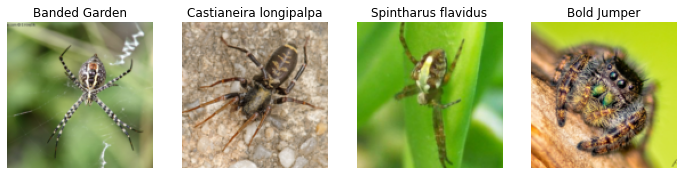

In [ ]:
dls = spiders.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

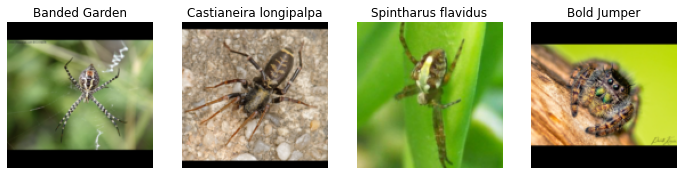

In [ ]:
# resize the images to make them square (128)
spiders = spiders.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = spiders.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

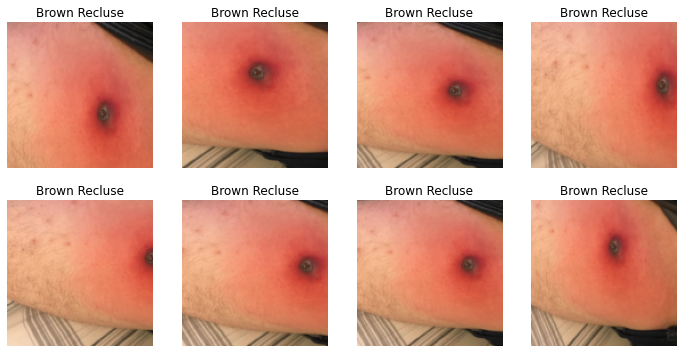

In [ ]:
spiders = spiders.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = spiders.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
spiders = spiders.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
batch_tfms=aug_transforms())
dls = spiders.dataloaders(path)                 

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [ ]:
learn = cnn_learner(dls, models.vgg19_bn, metrics=error_rate)
learn.fine_tune(5)
warnings.filterwarnings('ignore')

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,3.933167,2.506332,0.648600,01:24


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  

epoch,train_loss,valid_loss,error_rate,time
0,2.575806,2.252383,0.585366,01:27
1,2.279140,2.060998,0.547425,01:27
2,1.875974,1.963809,0.522132,01:28
3,1.546899,1.915186,0.488708,01:28
4,1.299468,1.878304,0.477868,01:28


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

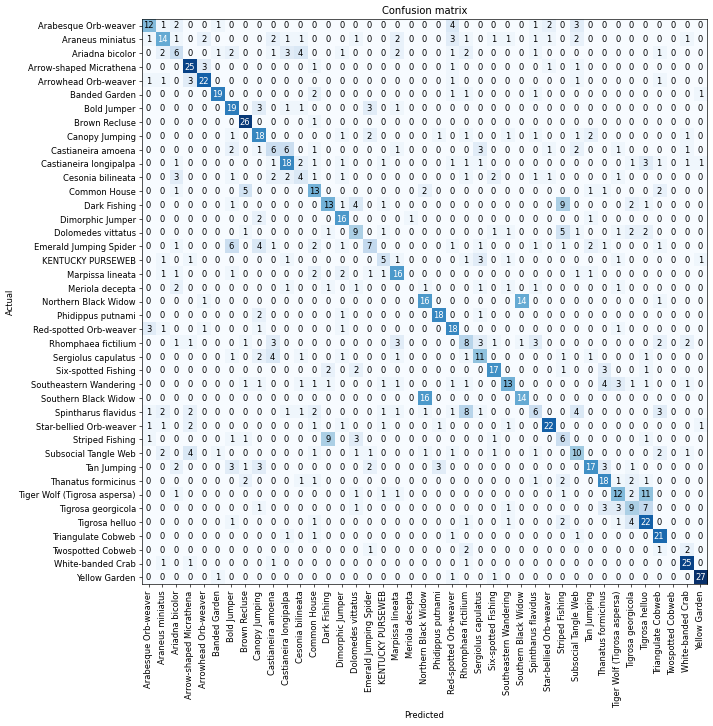

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_confusion_matrix()
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=8)

[('Southern Black Widow', 'Northern Black Widow', 16),
 ('Northern Black Widow', 'Southern Black Widow', 14),
 ('Tiger Wolf (Tigrosa aspersa)', 'Tigrosa helluo', 11),
 ('Dark Fishing', 'Striped Fishing', 9),
 ('Striped Fishing', 'Dark Fishing', 9),
 ('Spintharus flavidus', 'Rhomphaea fictilium', 8)]

In [ ]:
# Add the cleaner to clean up images that don't belong
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

In [ ]:
learn = cnn_learner(dls, models.vgg19_bn, metrics=error_rate)
learn.fine_tune(5)
warnings.filterwarnings('ignore')

epoch,train_loss,valid_loss,error_rate,time
0,3.955832,2.500605,0.648600,01:22


epoch,train_loss,valid_loss,error_rate,time
0,2.596923,2.243398,0.582656,01:26
1,2.268373,2.030961,0.541102,01:27
2,1.882641,1.945380,0.508582,01:30
3,1.525395,1.858642,0.489612,01:27
4,1.291993,1.848851,0.479675,01:27


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.910639,2.514686,0.655827,01:17


epoch,train_loss,valid_loss,error_rate,time
0,2.615440,2.204902,0.578139,01:17
1,2.252295,2.149577,0.566396,01:17
2,1.814411,1.955860,0.516712,01:16
3,1.451426,1.900645,0.504065,01:16
4,1.204217,1.889277,0.496838,01:17


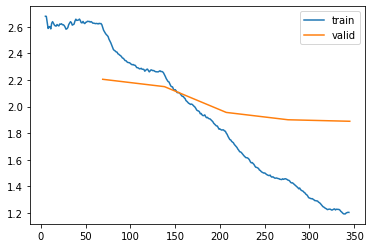

In [ ]:
learn.recorder.plot_loss()